## Project 5 - Communicate Data Findings

### Introduction & Motivation

This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis process. In the first part, I use Python visualization libraries to systematically explore Prosper Loan Data, starting from plots of single variables and building up to plots of multiple variables. In the second part, I produce a short presentation that illustrates interesting properties, trends, and relationships discovered. The primary method of conveying the findings will be through transforming the exploratory visualizations from the first part into polished, explanatory visualizations.

Data visualization is an important skill that is used in many parts of the data analysis process. Exploratory data visualization generally occurs during and after the data wrangling process, and is the main method used to understand the patterns and relationships present in a dataset. This understanding helps approach any statistical analyses and  build conclusions and findings. This process might also illuminate additional data cleaning tasks to be performed. Explanatory data visualization techniques are used after generating the data findings, and are used to help communicate the results to others. Understanding design considerations make sure that the message is clear and effective.



### Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import xticks
%matplotlib inline

### Gathering Data

In [2]:
df = pd.read_csv('prosperLoanData.csv')

### Assessing Data

In [3]:
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [4]:
print("The number of rows are {} and columns are {}".format(df.shape[0], df.shape[1]))

The number of rows are 113937 and columns are 81


In [5]:
# List columns
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [6]:
# Look for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

* There are missing values.

In [7]:
# Gathering the variables that will be used in the analysis:  
cols = ['Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors',
        'BorrowerState']

In [8]:
loan_df = df[cols]

In [9]:
loan_df.columns

Index(['Term', 'LoanStatus', 'EstimatedEffectiveYield', 'BorrowerAPR',
       'BorrowerRate', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus',
       'Occupation', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
       'PercentFunded', 'IncomeRange', 'Investors', 'BorrowerState'],
      dtype='object')

In [10]:
loan_df.describe()

,Term,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,Investors
count,113937.000000,84853.000000,113912.000000,113937.000000,84853.000000,84853.000000,113937.000000,106312.000000,1.139370e+05,113937.000000,113937.000000,105383.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.168661,0.218828,0.192764,4.072243,5.950067,2.774209,96.071582,5.608026e+03,272.475783,0.048027,0.275947,8337.01385,0.998584,80.475228
std,10.436212,0.068467,0.080364,0.074818,1.673227,2.376501,3.996797,94.480605,7.478497e+03,192.697812,0.332353,0.551759,6245.80058,0.017919,103.239020
min,12.000000,-0.182700,0.006530,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1000.00000,0.700000,1.000000
25%,36.000000,0.115670,0.156290,0.134000,3.000000,4.000000,1.000000,26.000000,3.200333e+03,131.620000,0.000000,0.140000,4000.00000,1.000000,2.000000
50%,36.000000,0.161500,0.209760,0.184000,4.000000,6.000000,1.000000,67.000000,4.666667e+03,217.740000,0.000000,0.220000,6500.00000,1.000000,44.000000
75%,36.000000,0.224300,0.283810,0.250000,5.000000,8.000000,3.000000,137.000000,6.825000e+03,371.580000,0.000000,0.320000,12000.00000,1.000000,115.000000
max,60.000000,0.319900,0.512290,0.497500,7.000000,11.000000,20.000000,755.000000,1.750003e+06,2251.510000,39.000000,10.010000,35000.00000,1.012500,1189.000000


In [11]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   EstimatedEffectiveYield    84853 non-null   float64
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ProsperRating (numeric)    84853 non-null   float64
 6   ProsperRating (Alpha)      84853 non-null   object 
 7   ProsperScore               84853 non-null   float64
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   EmploymentStatus           111682 non-null  object 
 10  Occupation                 110349 non-null  object 
 11  EmploymentStatusDuration   106312 non-null  float64
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  IncomeVerifiable           11

* There are still some null entries. As the purpose for this project is simply visualization, then these rows will be deleted.

In [12]:
# Deleting the null rows
loan_df = loan_df.dropna()

In [13]:
loan_df.describe()

,Term,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,Investors
count,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000
mean,42.760470,0.166738,0.223901,0.193621,4.132413,6.080246,3.302259,104.578028,6002.833586,296.421859,0.016571,0.258032,9294.999410,0.998131,69.998517
std,11.744005,0.067595,0.079372,0.074088,1.661460,2.360640,4.396670,95.836443,5110.743506,189.674943,0.187732,0.320587,6413.404265,0.020572,97.801415
min,12.000000,-0.181600,0.045830,0.040000,1.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1000.000000,0.700000,1.000000
25%,36.000000,0.114800,0.161570,0.134900,3.000000,4.000000,1.000000,32.000000,3583.333333,159.062500,0.000000,0.150000,4000.000000,1.000000,1.000000
50%,36.000000,0.157670,0.215660,0.184500,4.000000,6.000000,1.000000,76.000000,5041.666667,257.760000,0.000000,0.220000,8000.000000,1.000000,32.000000
75%,60.000000,0.219000,0.287800,0.254900,5.000000,8.000000,3.000000,150.000000,7250.000000,392.420000,0.000000,0.320000,14603.250000,1.000000,100.000000
max,60.000000,0.319900,0.423950,0.360000,7.000000,11.000000,20.000000,755.000000,483333.333333,2251.510000,19.000000,10.010000,35000.000000,1.012500,1189.000000


In [14]:
loan_df.head(3)

,Term,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,...,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,Investors,BorrowerState
1,36,Current,0.07960,0.12016,0.0920,6.0,A,7.0,2,Employed,...,True,6125.000000,318.93,0,0.18,10000,1.0,"$50,000-74,999",1,CO
3,36,Current,0.08490,0.12528,0.0974,6.0,A,9.0,16,Employed,...,True,2875.000000,321.45,0,0.15,10000,1.0,"$25,000-49,999",158,GA
4,36,Current,0.18316,0.24614,0.2085,3.0,D,4.0,2,Employed,...,True,9583.333333,563.97,0,0.26,15000,1.0,"$100,000+",20,MN


In [15]:
# Converting term into category. This will make the analysis more insightful
loan_df['Term'] = loan_df['Term'].astype('category')

In [16]:
loan_df.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_Alpha', 
                        'ProsperRating (numeric)': 'ProsperRating_Numeric',
                        'ListingCategory (numeric)' : 'ListingCategory_Numeric'
                       }, inplace=True)

In [17]:
# Identify the type of each variable
loan_df.dtypes

Term                        category
LoanStatus                    object
EstimatedEffectiveYield      float64
BorrowerAPR                  float64
BorrowerRate                 float64
ProsperRating_Numeric        float64
ProsperRating_Alpha           object
ProsperScore                 float64
ListingCategory_Numeric        int64
EmploymentStatus              object
Occupation                    object
EmploymentStatusDuration     float64
IsBorrowerHomeowner             bool
IncomeVerifiable                bool
StatedMonthlyIncome          float64
MonthlyLoanPayment           float64
Recommendations                int64
DebtToIncomeRatio            float64
LoanOriginalAmount             int64
PercentFunded                float64
IncomeRange                   object
Investors                      int64
BorrowerState                 object
dtype: object

In [18]:
# Create a separate dataframe with only numeric attributes
num_loan_df = loan_df.loc[:, (loan_df.dtypes == np.float64) | (loan_df.dtypes == np.int64)]
num_loan_df.columns

Index(['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
       'ProsperRating_Numeric', 'ProsperScore', 'ListingCategory_Numeric',
       'EmploymentStatusDuration', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
       'PercentFunded', 'Investors'],
      dtype='object')

In [19]:
# Create a separate dataframe with only categorical attributes
cat_loan_df = loan_df.loc[:, (loan_df.dtypes == 'object') | (loan_df.dtypes == 'category')]
cat_loan_df.columns


Index(['Term', 'LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus',
       'Occupation', 'IncomeRange', 'BorrowerState'],
      dtype='object')

#### Final Gathered Data
The above data obtained is the tidy final dataset. There's no null entries in this data.

##### What is the structure of this dataset?
The Prosper Loan dataset contains 113,937 loans with 81 variables on each loan (i.e. loan amount, borrower rate (or interest rate), current loan status, borrower income, ...). For simplicity of the visualization a few variables were choosed to be analyzed.


##### What are the main features of interest in the dataset?

The main question aroused from this dataset during the assesment is: what features are best for predicting the Loan outcome?

##### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The loan status will have huge impact with the background of the borrower like occupation, income, whether the applicant is with homeown status and prosper rating.

### Data Visualization

#### Univariate Exploration

##### Categorical attributes visualization

In [20]:
loan_df.columns

Index(['Term', 'LoanStatus', 'EstimatedEffectiveYield', 'BorrowerAPR',
       'BorrowerRate', 'ProsperRating_Numeric', 'ProsperRating_Alpha',
       'ProsperScore', 'ListingCategory_Numeric', 'EmploymentStatus',
       'Occupation', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
       'PercentFunded', 'IncomeRange', 'Investors', 'BorrowerState'],
      dtype='object')

In [21]:
loan_df['IsBorrowerHomeowner'].value_counts()

True     41454
False    34762
Name: IsBorrowerHomeowner, dtype: int64

In [22]:
loan_df['ProsperRating_Alpha'].value_counts()

C     16499
B     14379
A     13490
D     12629
E      8443
HR     5680
AA     5096
Name: ProsperRating_Alpha, dtype: int64

In [23]:
loan_df['IncomeRange'].value_counts()

$50,000-74,999    23692
$25,000-49,999    21421
$100,000+         13977
$75,000-99,999    13547
$1-24,999          3578
Not employed          1
Name: IncomeRange, dtype: int64

* It seems like the order has to be maintained because this is an ordinal variable

<Figure size 720x360 with 0 Axes>

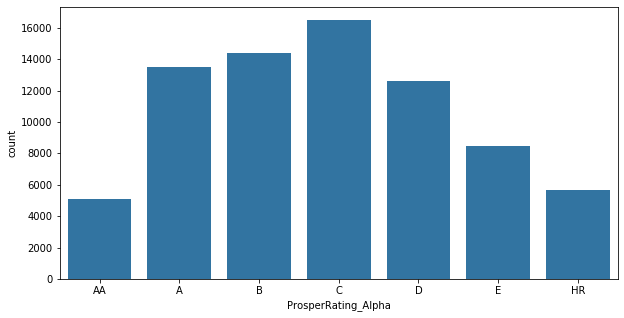

In [24]:
# Plot the data maintaining the order
plt.figure(figsize = [10, 5]) 
ProsperRating_Alpha_classes = ['AA','A', 'B', 'C', 'D', 'E', 'HR']
IncomeRange_classes = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRating_Alpha_classes)
    loan_df['ProsperRating_Alpha'] = loan_df['ProsperRating_Alpha'].astype(vclasses)
    vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRange_classes)
    loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(vclasses_1)
else: # compatibility for v.20
    loan_df['ProsperRating_Alpha'] = loan_df['ProsperRating_Alpha'].astype('category', ordered = True,
                                                     categories = ProsperRating_Alpha_classes)
    loan_df['IncomeRange'] = loan_df['IncomeRange'].astype('category', ordered = True,
                                                     categories = IncomeRange_classes)

plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'ProsperRating_Alpha', color = base_color);

**ListingCategory (Nominal Variable):** 

* The category of the listing that the borrower selected when posting their listing: 

  0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans


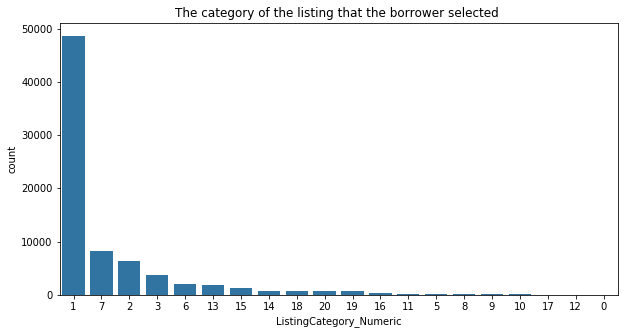

In [25]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("The category of the listing that the borrower selected ")
sb.countplot(data = loan_df, x = 'ListingCategory_Numeric', color = base_color,
             order = loan_df['ListingCategory_Numeric'].value_counts().index );

In [26]:
loan_df['LoanStatus'].value_counts()

Current                   51170
Completed                 17687
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        714
Past Due (31-60 days)       322
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

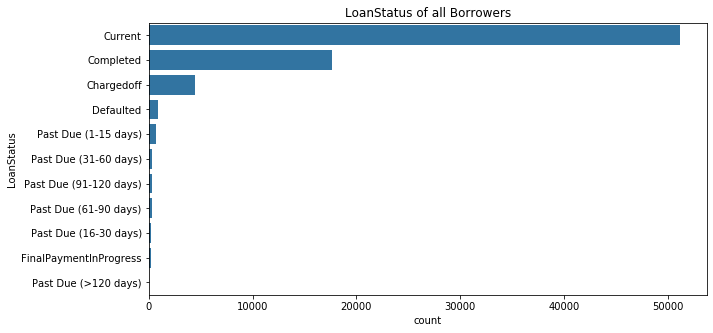

In [27]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("LoanStatus of all Borrowers")
sb.countplot(data = loan_df, y = 'LoanStatus', color = base_color,
             order = loan_df['LoanStatus'].value_counts().index);

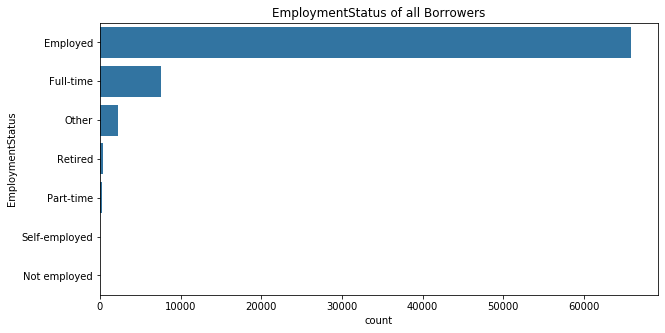

In [28]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("EmploymentStatus of all Borrowers")
sb.countplot(data = loan_df, y = 'EmploymentStatus', color = base_color,
             order = loan_df['EmploymentStatus'].value_counts().index);

In [29]:
loan_df['IncomeRange'].value_counts()

$50,000-74,999    23692
$25,000-49,999    21421
$100,000+         13977
$75,000-99,999    13547
$1-24,999          3578
Name: IncomeRange, dtype: int64

In [30]:
loan_df_1 = loan_df[loan_df['IncomeRange'] != 'Not employed']

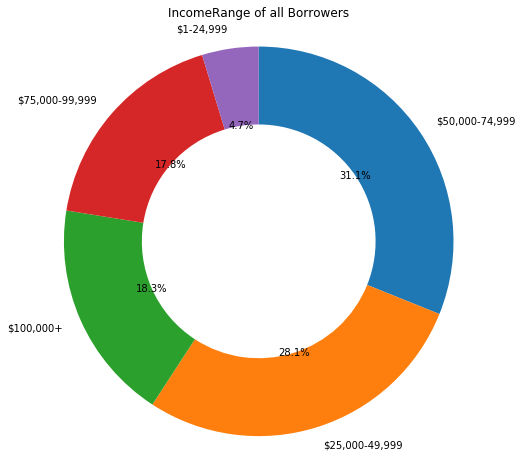

In [31]:
plt.figure(figsize = [15, 8])
sorted_counts = loan_df_1['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4}, autopct   = '%.1f%%');
plt.title("IncomeRange of all Borrowers")
plt.axis('square');

In [32]:
loan_df['BorrowerState'].value_counts().head(10)

CA    9574
NY    5184
TX    5086
FL    4738
IL    3871
OH    3061
GA    3006
VA    2530
NJ    2463
PA    2416
Name: BorrowerState, dtype: int64

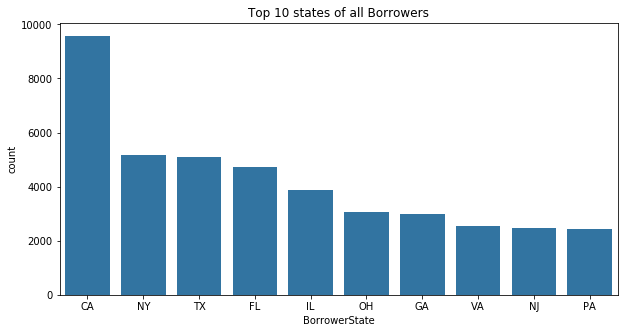

In [33]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'BorrowerState', color = base_color,
             order = loan_df['BorrowerState'].value_counts().head(10).index );
plt.title("Top 10 states of all Borrowers");

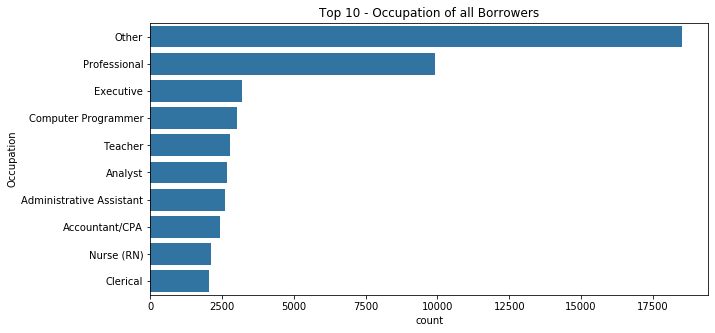

In [34]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, y = 'Occupation', color = base_color,
             order = loan_df['Occupation'].value_counts().head(10).index );
plt.title("Top 10 - Occupation of all Borrowers");

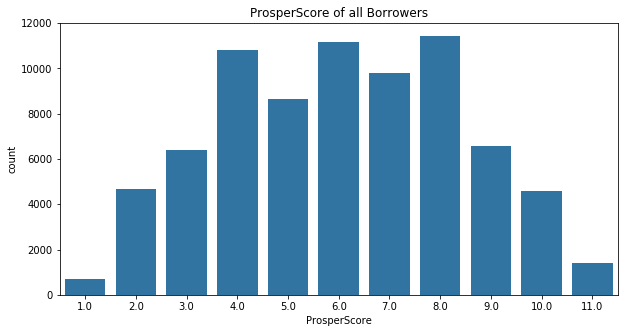

In [35]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'ProsperScore', color = base_color);
plt.title("ProsperScore of all Borrowers");

### Insights obtained in the categorical variables analysis

* Loans with **"AA"** category are with lesser count;

* The top 2 loan consideration reasons are **1 - Debt Consolidation**, **2 - Home Improvement**;

* LoanStatus of all Borrowers are with **current** and **completed** state;

* EmploymentStatus of all Borrowers are with **Employed** State;

* Top IncomeRange of all Borrowers are within **$50,000-74,999**;

* Top 2 states of all Borrowers are from **CA** and **NY**;

* Majority of the borrowers are with an occupation of **Professional** and **Executive**;

* Majority of the borrowers are with a rating or score from **4 to 8**.

##### Numerical attributes visualization

* The numerical attributes are: 
   'Term', 'EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
   'ProsperRating_Numeric', 'ProsperScore', 'ListingCategory_Numeric',
   'EmploymentStatusDuration', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
   'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
   'PercentFunded', 'Investors'

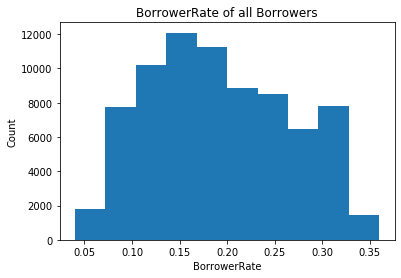

In [36]:
plt.hist(data = loan_df, x = 'BorrowerRate');
plt.xlabel('BorrowerRate');
plt.ylabel('Count');
plt.title("BorrowerRate of all Borrowers");

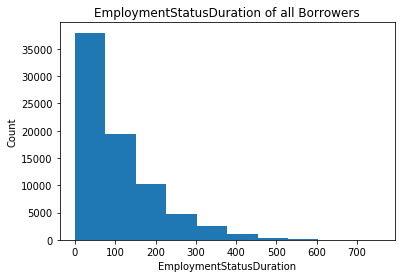

In [37]:
plt.hist(data = loan_df, x = 'EmploymentStatusDuration');
plt.xlabel('EmploymentStatusDuration');
plt.ylabel('Count');
plt.title("EmploymentStatusDuration of all Borrowers");

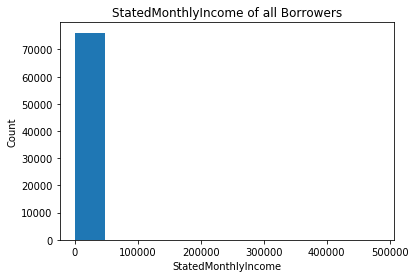

In [38]:
plt.hist(data = loan_df, x = 'StatedMonthlyIncome');
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

In [39]:
(loan_df['StatedMonthlyIncome'].describe())

count     76216.000000
mean       6002.833586
std        5110.743506
min           0.250000
25%        3583.333333
50%        5041.666667
75%        7250.000000
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

In [40]:
np.log10(loan_df['StatedMonthlyIncome'].describe())

count    4.882046
mean     3.778356
std      3.708484
min     -0.602060
25%      3.554287
50%      3.702574
75%      3.860338
max      5.684247
Name: StatedMonthlyIncome, dtype: float64

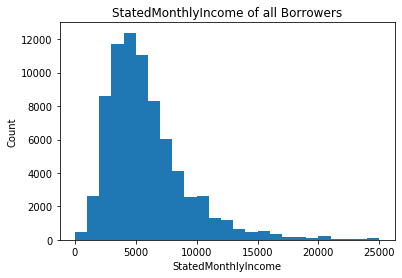

In [41]:
loan_df_sub = loan_df[loan_df['StatedMonthlyIncome'] <= 25000]
bin_edges = np.arange(0, loan_df_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data = loan_df, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

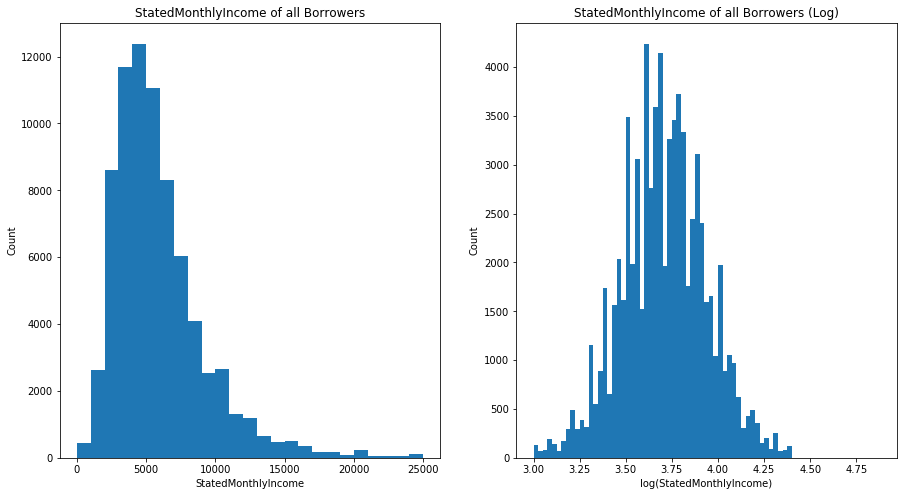

In [42]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data =loan_df_sub, x = 'StatedMonthlyIncome', bins = bin_edges)
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

# right histogram: data plotted after direct log10 transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df_sub['StatedMonthlyIncome']) # direct data transform
log_bin_edges = np.arange(3, log_data.max()+0.5, 0.025)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(StatedMonthlyIncome)');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers (Log)");

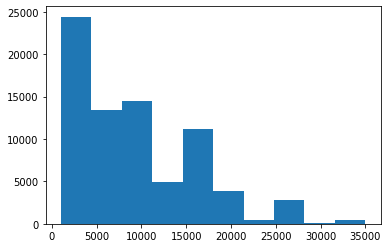

In [43]:
plt.hist(data = loan_df, x = 'LoanOriginalAmount');

In [44]:
(loan_df['LoanOriginalAmount'].describe())

count    76216.000000
mean      9294.999410
std       6413.404265
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14603.250000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

In [45]:
np.log10(loan_df['LoanOriginalAmount'].describe())

count    4.882046
mean     3.968249
std      3.807089
min      3.000000
25%      3.602060
50%      3.903090
75%      4.164450
max      4.544068
Name: LoanOriginalAmount, dtype: float64

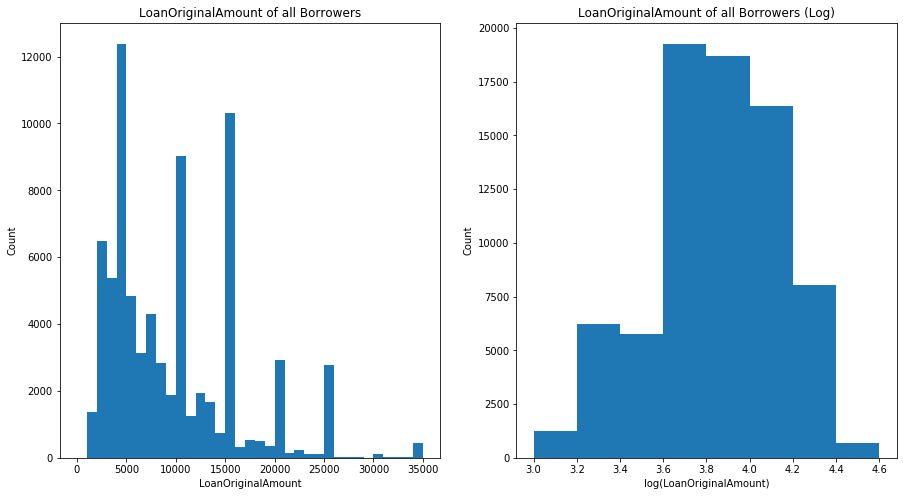

In [46]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data =loan_df, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df['LoanOriginalAmount']) # direct data transform
log_bin_edges = np.arange(3.0, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(LoanOriginalAmount)');
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers (Log)");

loan_df['LoanOriginalAmount_log'] = np.log10(loan_df['LoanOriginalAmount'])

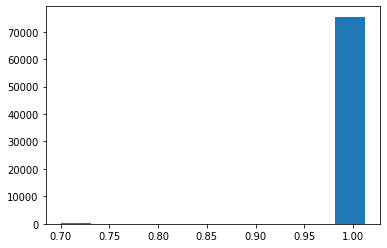

In [47]:
plt.hist(data = loan_df, x = 'PercentFunded');

In [48]:
loan_df['Investors'].min(), loan_df['Investors'].max(), 

(1, 1189)

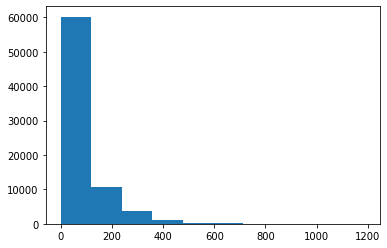

In [49]:
plt.hist(data = loan_df, x = 'Investors');

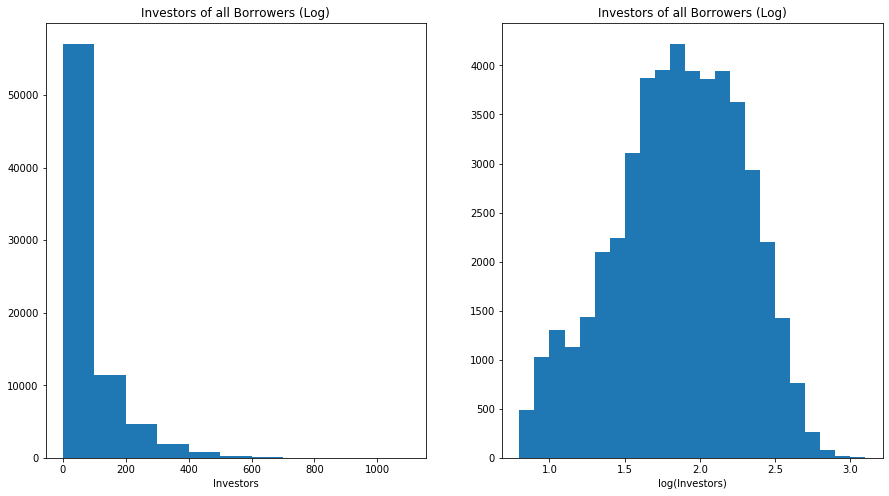

In [50]:
plt.figure(figsize = [15, 8])

# Plot the left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df['Investors'].max()+10, 100)
plt.hist(data =loan_df, x = 'Investors', bins = bin_edges)
plt.xlabel('Investors')
plt.title("Investors of all Borrowers (Log)");

# Plot right histogram: data plotted after direct log10 transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df['Investors']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Investors)')
plt.title("Investors of all Borrowers (Log)");

loan_df['Investors_log'] = np.log10(loan_df['Investors'])

### Insights obtained in the numerical variables analysis

* **BorrowerRate :**	*The Borrower's interest rate for this loan.* The borrowers rate follow an approximately unimodal distribution, with the peak around 0.16. There seems to be a spike that occurs around 0.32;
  
* **StatedMonthlyIncome :**	*The monthly income the borrower stated at the time the listing was created. Monthly Income follows a right skewed distribution. The outliers were cut and the data transformed to look at log 10 scales. Majority of the borrowers are having a salary with less than 10000 USD and the peak is observed at 5000 USD*;
 
* **LoanOriginalAmount:** The origination amount of the loan. A interesting pattern was observed on this variable. The distribution is a right skewed with multiple peaks observed at 4000 USD, 10000 USD and 15000 USD;

* **Investors:** Majority of the investors are between 0 and 100.

#### Bivariate Exploration
##### Relationship between two numeric variables

In [51]:
loan_df.dtypes

Term                        category
LoanStatus                    object
EstimatedEffectiveYield      float64
BorrowerAPR                  float64
BorrowerRate                 float64
ProsperRating_Numeric        float64
ProsperRating_Alpha         category
ProsperScore                 float64
ListingCategory_Numeric        int64
EmploymentStatus              object
Occupation                    object
EmploymentStatusDuration     float64
IsBorrowerHomeowner             bool
IncomeVerifiable                bool
StatedMonthlyIncome          float64
MonthlyLoanPayment           float64
Recommendations                int64
DebtToIncomeRatio            float64
LoanOriginalAmount             int64
PercentFunded                float64
IncomeRange                 category
Investors                      int64
BorrowerState                 object
LoanOriginalAmount_log       float64
Investors_log                float64
dtype: object

In [52]:
numeric_vars = ['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
                'ProsperRating_Numeric', 'ProsperScore', 
                'ListingCategory_Numeric','EmploymentStatusDuration', 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount','PercentFunded', 'Investors', 'LoanOriginalAmount_log',
                 'Investors_log']

numeric_vars_1 = ['BorrowerRate',
                 'ProsperScore',                 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'LoanOriginalAmount', 'Investors' ,'LoanOriginalAmount_log',
                 'Investors_log']

categoric_vars = ['LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus', 'Occupation',
       'IncomeRange', 'BorrowerState', 'Term', 'IsBorrowerHomeowner']

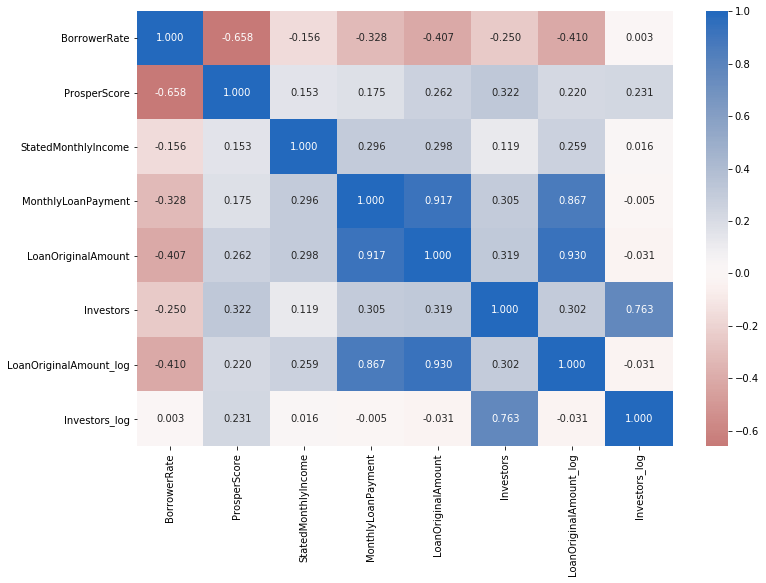

In [53]:
# Plot correlation with heatmap
plt.figure(figsize = [12, 8])
sb.heatmap(loan_df[numeric_vars_1].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### Relationship between  numeric & categorical variables

<Figure size 1080x1080 with 0 Axes>

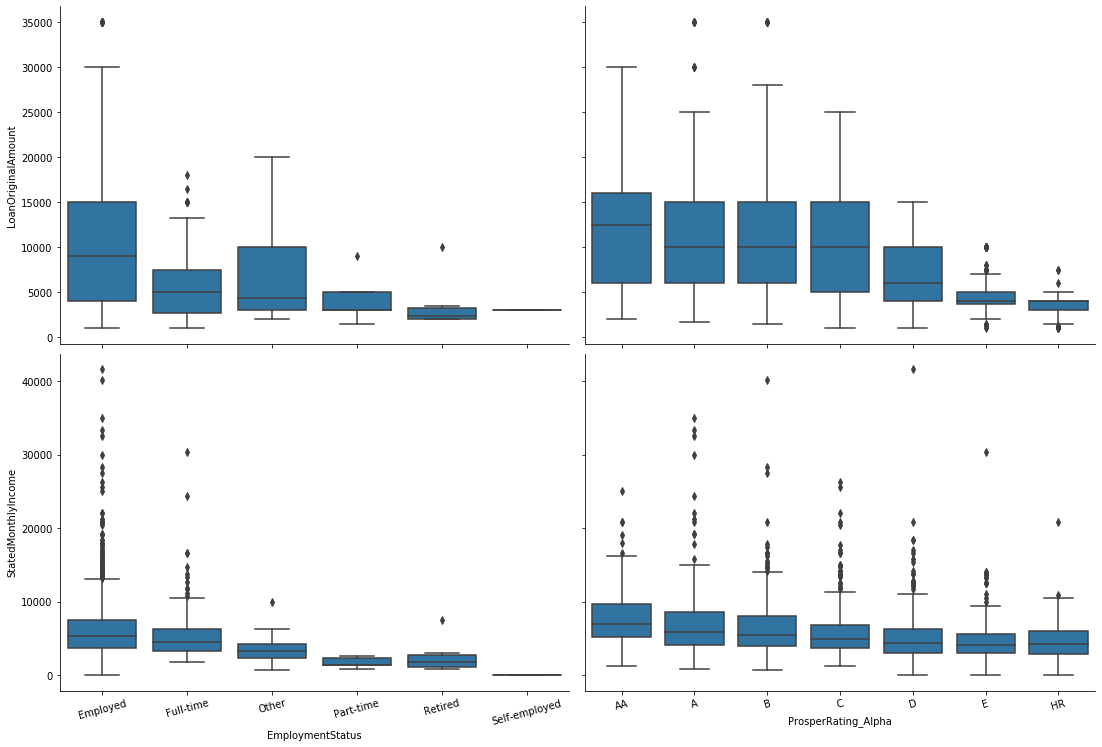

In [100]:
# Plot matrix of numeric features against categorical features.
categoric_vars_1 = ['EmploymentStatus', 'ProsperRating_Alpha']
samples = np.random.choice(loan_df.shape[0], 2000, replace = False)
loan_df_samp = loan_df.iloc[samples]

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 15)
    
plt.figure(figsize = [15, 15])
g = sb.PairGrid(data = loan_df_samp, y_vars = [ 'LoanOriginalAmount', 'StatedMonthlyIncome'], 
                x_vars = categoric_vars_1, height = 5, aspect = 1.5)

g.map(boxgrid);
plt.xticks(rotation = 15)
plt.show();

Text(0.5, 1.0, 'Income Range vs Loan Amount')

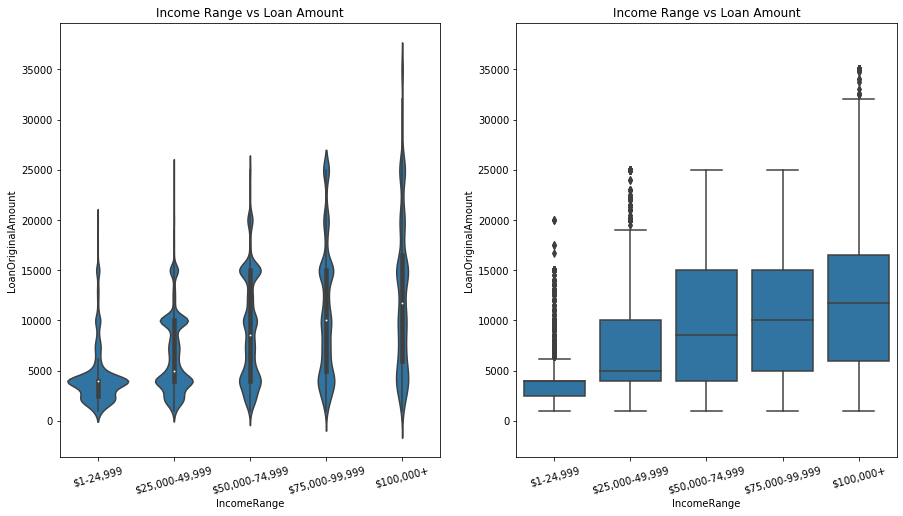

In [101]:
loan_df_sub = loan_df[(loan_df['StatedMonthlyIncome'] <= 10000) ]
loan_df_sub = loan_df_sub[loan_df_sub['IncomeRange'] != 'Not employed']


plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

#### Categorical variables analysis

Text(0.5, 1, 'Count of Applicants w.r.t LoanStatus and HomeownerStatus')

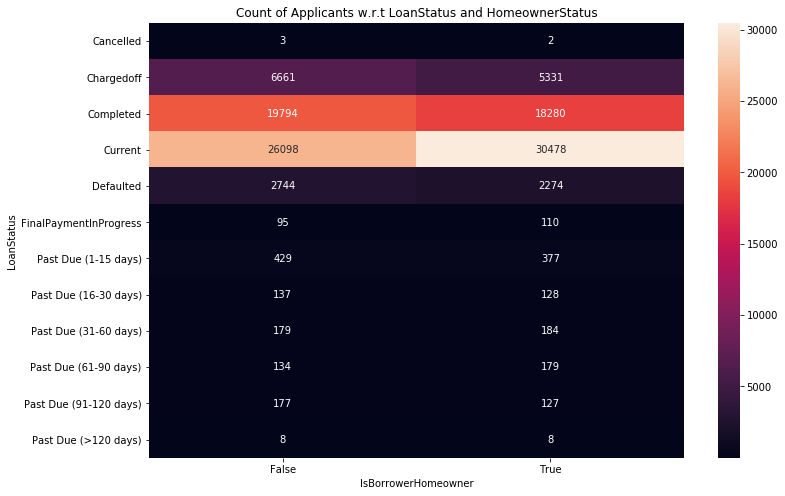

In [102]:
plt.figure(figsize = [12, 8])
ct_counts = df.groupby(['IsBorrowerHomeowner', 'LoanStatus']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'IsBorrowerHomeowner', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd');
plt.title('Count of Applicants w.r.t LoanStatus and HomeownerStatus')

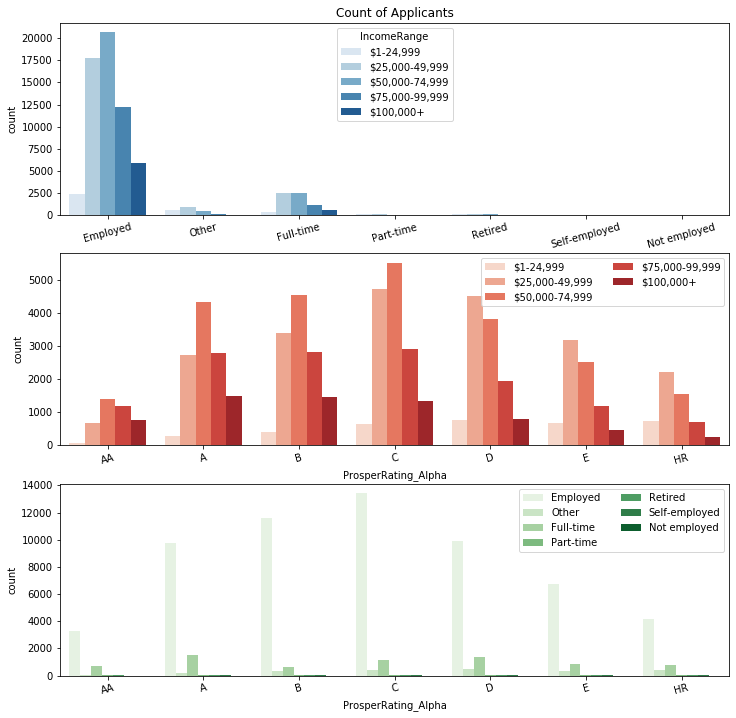

In [103]:
categoric_vars = ['EmploymentStatus', 'ProsperRating_Alpha', 'IncomeRange']

plt.figure(figsize = [12, 12])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = loan_df_sub, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation = 15)
plt.title('Count of Applicants')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'IncomeRange', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)


# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)


plt.show()

### Insights obtained in the bivariate analysis

* Loan original amount and monthly loan payment is highly correlated as it was expected and borrowers interest rate and proper score are highly correlated. Borrower interest rate and loan amount are correlated too;

* Majority of the borrowers with highest loan amount are taken by Employed, this is followed by others and fulltime employees;

* The range of the salaries stated is higher for employed borrowers;

* LoanOriginalAmount is highest for A and B Prosper ratings, when compared with income range it is following a normal or expected trend that more salary borrowers are having higher loanoriginalamount;

* LoanStatus with current and completed have own homes when they applied for loans;

* Majority of the loan applicants are from 50K to 75K range with emloyeed status;

* Applicants with incomerange of 50K to 75K range have their prosper rating falling under AA, A, B and C. 

### Multivariate Exploration

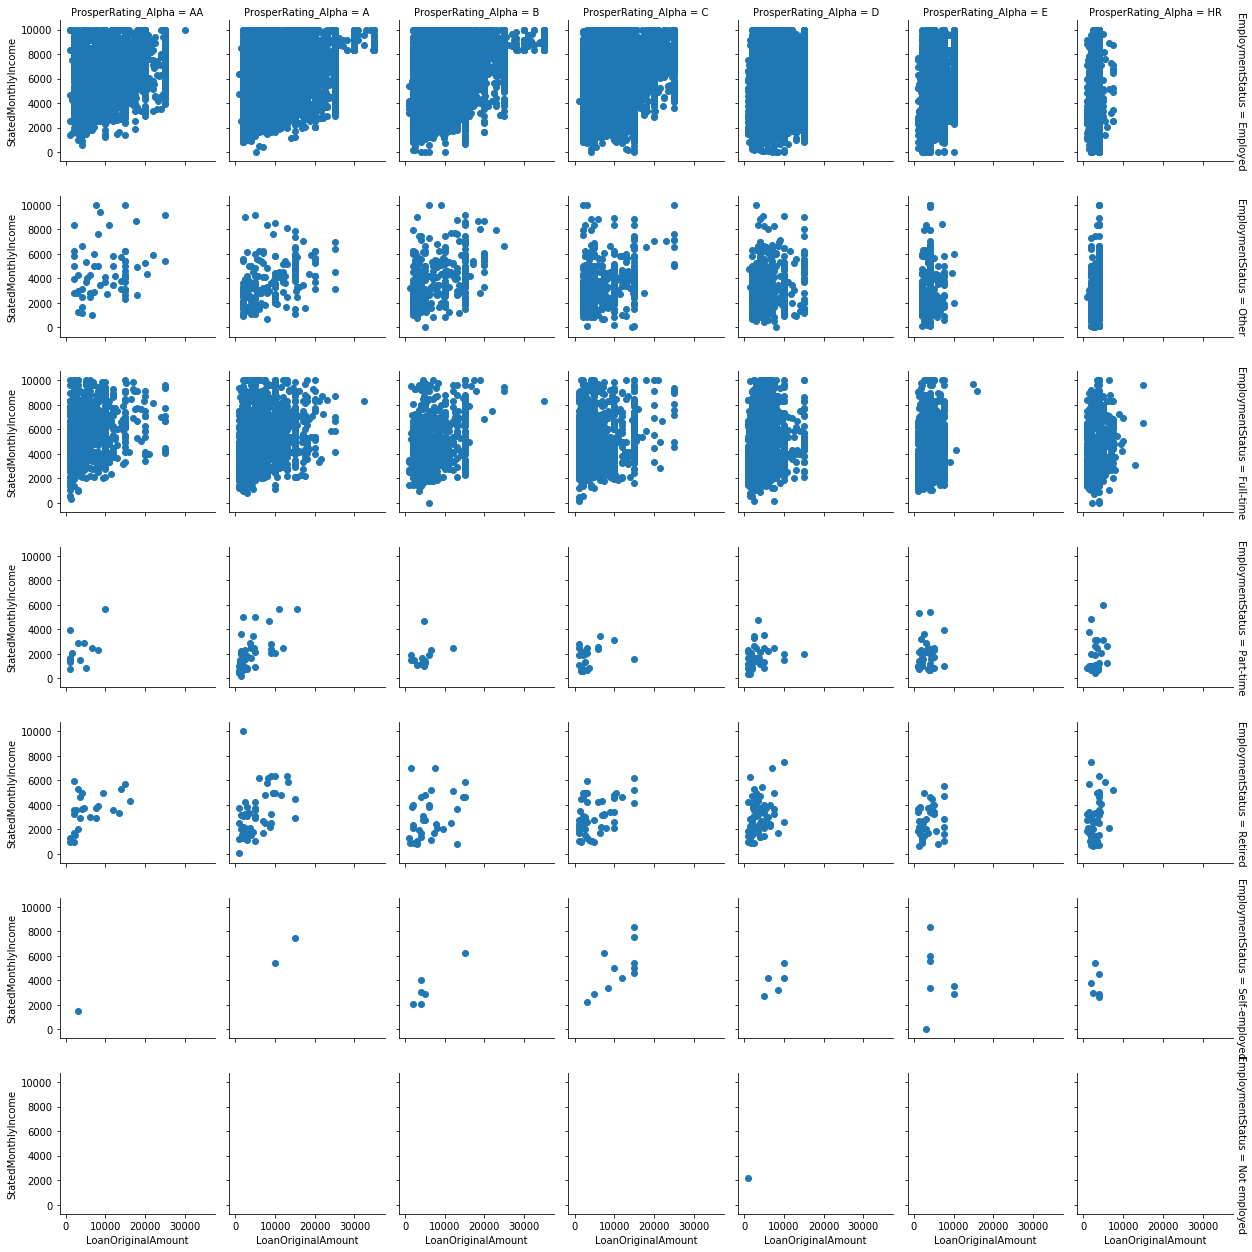

In [105]:
g = sb.FacetGrid(data = loan_df_sub, col = 'ProsperRating_Alpha', row = 'EmploymentStatus', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'StatedMonthlyIncome');

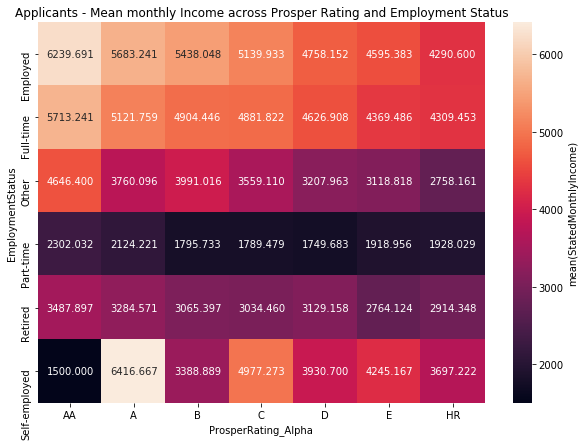

In [106]:
plt.figure(figsize = [10, 7])
loan_df_sub = loan_df_sub[loan_df_sub['EmploymentStatus'] != 'Not employed']

cat_means = loan_df_sub.groupby(['ProsperRating_Alpha', 'EmploymentStatus']).mean()['StatedMonthlyIncome']
cat_means = cat_means.reset_index(name = 'StatedMonthlyIncome_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'ProsperRating_Alpha',
                            values = 'StatedMonthlyIncome_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(StatedMonthlyIncome)'});
plt.title('Applicants - Mean monthly Income across Prosper Rating and Employment Status');

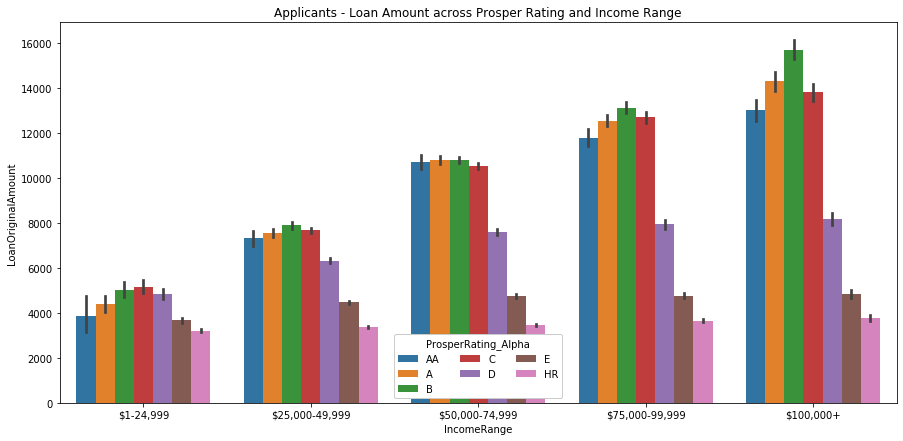

In [107]:
plt.figure(figsize = [15, 7])

ax = sb.barplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'ProsperRating_Alpha')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'ProsperRating_Alpha')
plt.title('Applicants - Loan Amount across Prosper Rating and Income Range');

#### Does rating depend on the monhtly income and Employment status?

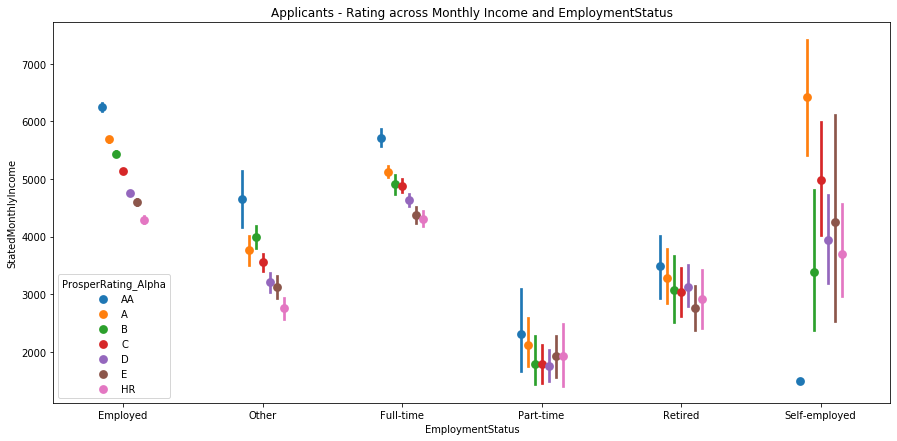

In [108]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_df_sub, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating_Alpha',
                  dodge = 0.3, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');

#### Did homeowner status has impacted the ProsperRating and Borrower Interest Rate?

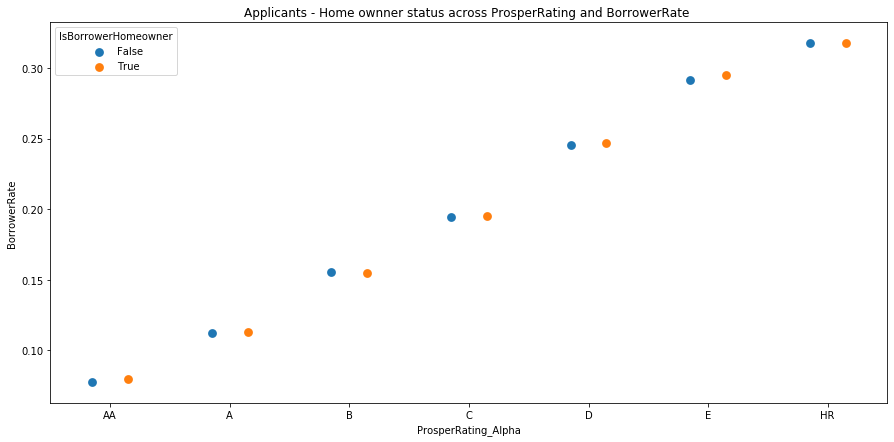

In [109]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_df_sub, x = 'ProsperRating_Alpha', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "");
plt.title('Applicants - Home ownner status across ProsperRating and BorrowerRate ');

### Insights obtained in the bivariate analysis

* For Applicants with prosper ratings from AA to D have the higher loan amount with increased salary;

* Employed and full time employees have their mean salaries in higher range;

* Majority of the borrowers are falling under prosper rating of B, irrespective of the income range;

* The monthly income of borrowers are having higher values for employed, other and full time employment status with the prosper rating  of AA, A and B;

* We observe that without homeowner tend to have a higher interest rate, and thus lower rating.However  homeowner tends to have lower interest rate and higher rating.  So we can safely say that homeowner is safest bet when gving a loan. We can also clearly observe that HR prosper rating applicants have higher interest rates;

### Conclusions

This work focused on the analysis of the Prosper Loan Data. The analysis covered univariate, bivariate and multivariate data analysis. Many plots and statistics were made to help the visualization and insight gain of the data. To conclude this analysis, I'd say that the loan approval status is heavily dependent on the applicant's information on IncomeRange, Homeownerstatus and employment status.